In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as m
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#exercice 1


In [3]:
knn=KNeighborsClassifier(n_neighbors=3)
heart=pd.read_csv("heart.csv")
x=heart.drop("target",axis=1)
y=heart.target
knn.fit(x,y)
ypredit=knn.predict(x)
knn.score(x,y)
#another possibility 
'''import pandas as pd
df=pd.read_csv("heart.csv")
c=df.Shape[1]
X=df.values[:,:c-1]
y=df.values'''

0.759075907590759

In [43]:
VN,FP,FN,VP=m.confusion_matrix(y,ypredit).ravel()
accuracy=(VN+VP)/(len(ypredit))
precision=VP/(VP+FP)
rappel=VP/(VP+FN)
print(rappel)
print(precision)
print(accuracy)
f_mesure=2*(precision*rappel)/(precision+rappel)
f_mesure

0.7818181818181819
0.7771084337349398
0.759075907590759


0.7794561933534743

In [44]:
print(m.recall_score(y,ypredit))
print(m.precision_score(y,ypredit))
print(m.accuracy_score(y,ypredit))
print(m.f1_score(y,ypredit))

0.7818181818181819
0.7771084337349398
0.759075907590759
0.7794561933534743


In [9]:
#exercice2
iris=pd.read_csv("iris.csv")
knn2=KNeighborsClassifier(n_neighbors=5)
X=iris.drop("class",axis=1)
Y=iris["class"]
knn2.fit(X,Y)
Ypredit=knn2.predict(X)
knn2.score(X,Y)

0.9666666666666667

In [11]:
def score(y,ypredit):
    s=0
    for i in range (len(y)):
        if (y[i]==ypredit[i]):
            s+=1
    return s/len(y)


score(Y,Ypredit)

0.9666666666666667

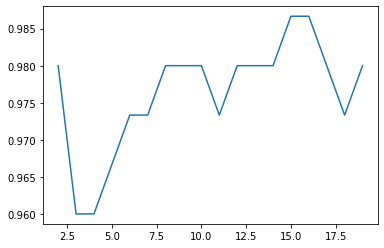

In [12]:
lk,li=[],[]
for i in range(2,20):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X,Y)
    lk.append(k.score(X,Y))
    li.append(i)
plt.plot(li,lk)

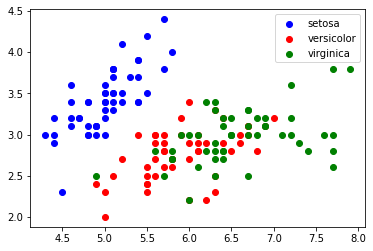

In [13]:
plt.scatter(iris["sepal_length_in_cm"][iris["class"] =="Iris-setosa"],iris["sepal_width_in_cm"][iris["class"] =="Iris-setosa"],c="b",  label="setosa")
plt.scatter(iris["sepal_length_in_cm"][iris["class"] =="Iris-versicolor"],iris["sepal_width_in_cm"][iris["class"] =="Iris-versicolor"],c="r",label="versicolor")
plt.scatter(iris["sepal_length_in_cm"][iris["class"] =="Iris-virginica"],iris["sepal_width_in_cm"][iris["class"] =="Iris-virginica"],c="g",label="virginica")
plt.legend()

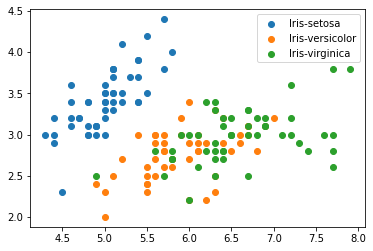

In [14]:
for i in iris["class"].unique():
    plt.scatter(iris["sepal_length_in_cm"][iris["class"] ==i],iris["sepal_width_in_cm"][iris["class"] ==i],label=i)
plt.legend()


In [15]:
obs=iris[:1]
obs=obs.drop("class",axis=1)
obs
obs["sepal_length_in_cm"][0]=5
obs["sepal_width_in_cm"][0]=4
obs["petal_length_in_cm"][0]=1.4
obs["petal_width_in_cm"][0]=0.2

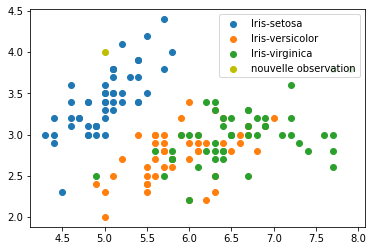

In [16]:
for i in iris["class"].unique():
    plt.scatter(iris["sepal_length_in_cm"][iris["class"] ==i],iris["sepal_width_in_cm"][iris["class"] ==i],label=i)

plt.scatter(obs["sepal_length_in_cm"],obs["sepal_width_in_cm"],label="nouvelle observation", c="y")
plt.legend()

In [17]:
knn2.predict(obs)

array(['Iris-setosa'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
kn=KNeighborsClassifier(5)
kn.fit(X_train,y_train)
kn.score(X_test,y_test)

1.0

In [28]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=10) 
cv_scores = cross_val_score(knn_cv, X, Y, cv=10)
print(cv_scores)
cv_scores.mean()



[1.         0.93333333 1.         1.         1.         0.86666667
 0.93333333 0.93333333 1.         1.        ]


0.9666666666666668